In [1]:
# import modules
import sys
import os
import numpy as np
import serpentTools
from matplotlib import rc
# add "coremap" directories to path
coremapath = 'C:\\Users\\39346\\Documents\\mycodes\\coreutils\\coremap'
sys.path.append(coremapath)
from CoreMap import CoreMap as cm
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200  # set dpi for increasing plot rendering quality

# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# for Palatino and other serif fonts use:
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
rc('text', usetex=True)

# input file name and location
fname = 'alfred_1_6.txt'

# define geometrical parameters
L = 1.386  # pitch [cm]
rotangle = 60  # rotation angle [degree]

# instance initialisation
core = cm(fname, rotangle, L)

# show attributes of instance "core"
print("CoreMap instance attributes are:")
for k, v in core.__dict__.items():
    print(k)

CoreMap instance attributes are:
rotation_angle
inp
type
assembly
Nx
Ny
fren2serp
serp2fren
serpcentermap


C:\Users\39346\Documents\mycodes\coreutils\coremap\CoreMap.py:511: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  fill=fill, **kwargs)


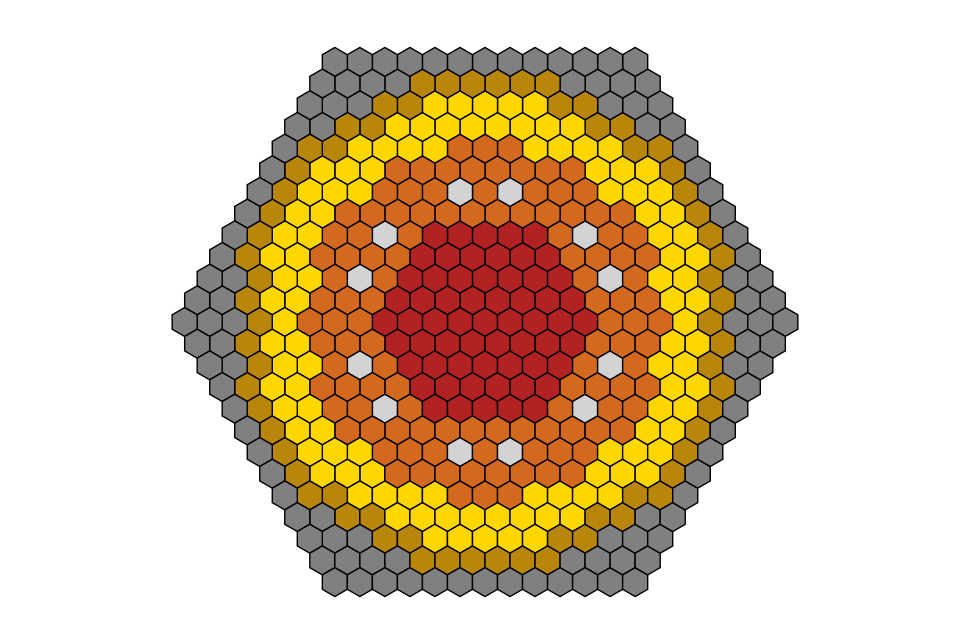

In [2]:
# Do you want to plot the geometry with assembly numbers according to Serpent numeration (default)?
core.plot()

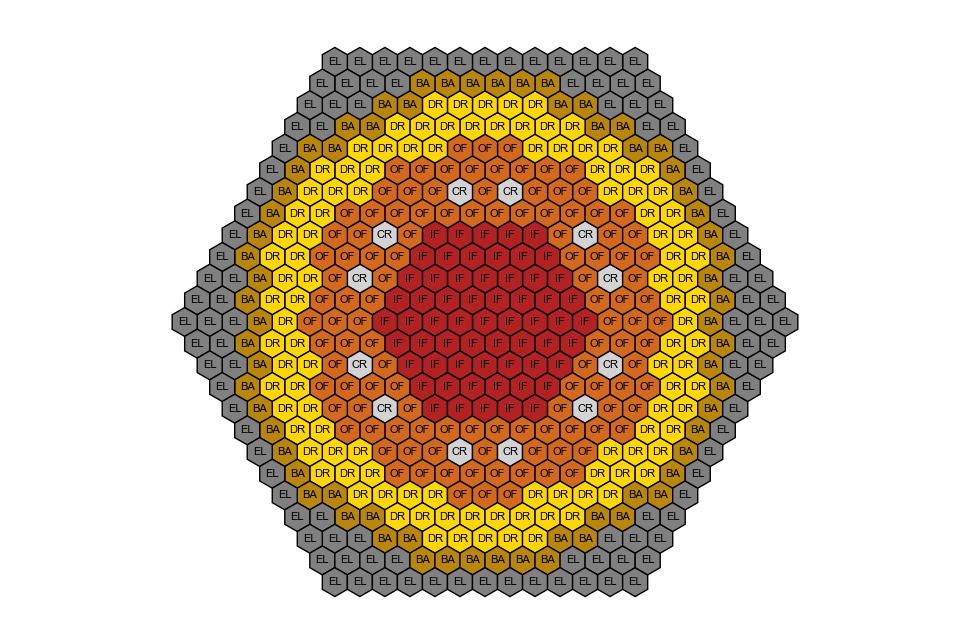

In [3]:
# Do you want custom labels? Just define them using a python dictionary
coretype = [1, 2, 3, 4, 6, 7]  # list with assembly numbers
corelabel = ['IF', 'OF', 'DR', 'CR', 'BA', 'EL']  # list with assembly names (string)
asslabel = dict(zip(coretype, corelabel))  # zip lists and make the zip a dictionary

# plot with customised assembly labels
core.plot(label=True, dictname=asslabel)  # specify figname to save the figure

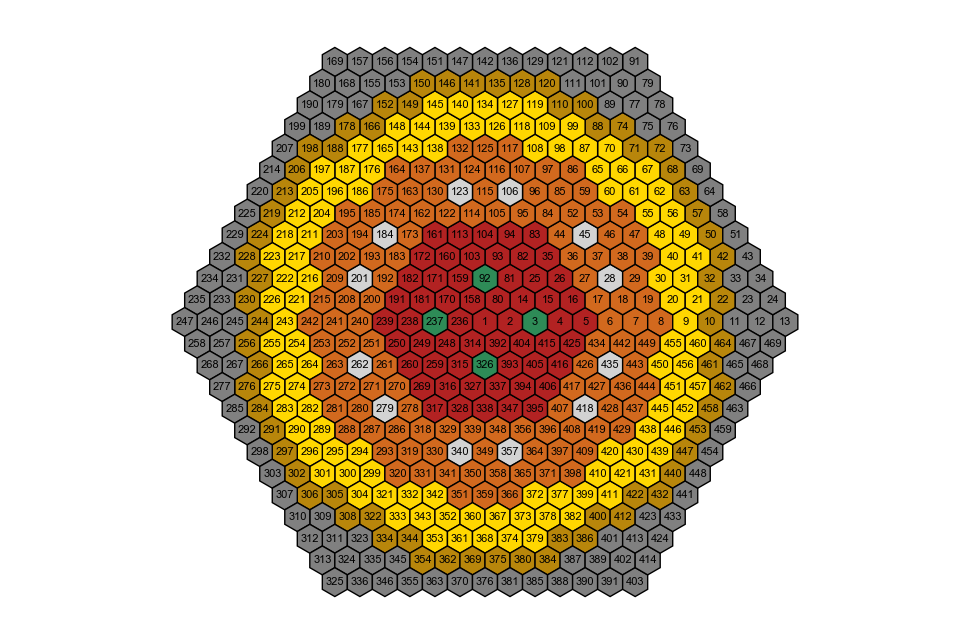

In [4]:
# Do you want to load new assemblies?
# let's load ALFRED's safety rods
SR_fren_position = [92, 326, 237, 3]  # assemblies to be perturbed
SR_type = [5]  # new assembly type
core.loadassembly(SR_type, SR_fren_position, flagfren=1)

# plot new geometry without any label
cm.plot(core, label=True, fren=True) 

dict_keys(['POW', 'FLX', 'POW2', 'FLX2'])


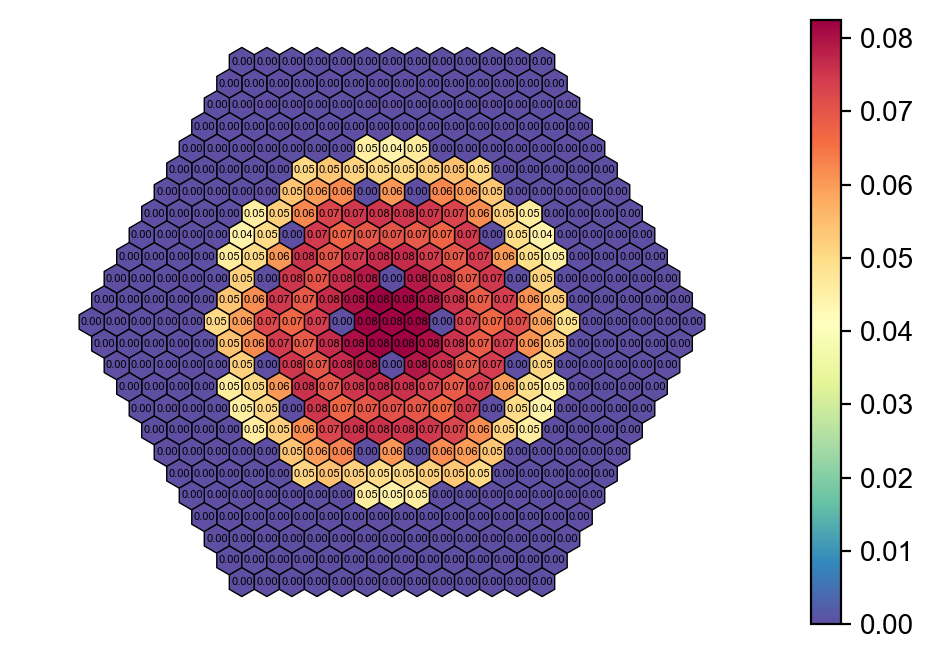

In [5]:
# Serpent (v 2.1.31) output path
# read Serpent output file with serpentTools
alfred = serpentTools.read("ALFRED_FC_HFP_det0.m")
# get available tallies
print(alfred.detectors.keys())

POW = alfred.detectors['POW']
tallies = POW.tallies[0, :, :]
errors = POW.errors[0, :, :]

# try to plot physics
tallies_mod = tallies/1e6
Nx, Ny = tallies_mod.shape
assnum = np.arange(2+Nx, Nx*Ny+2+Nx)
# flattening sq. or hex. lattice by rows
tallies_mod = tallies_mod.flatten('C')
errors = 2*(errors.flatten('C')*tallies_mod)
tallies_mod = dict(zip(assnum, tallies_mod))
errors = dict(zip(assnum, errors))
core.plot(what={"tallies": tallies_mod}, label=True)

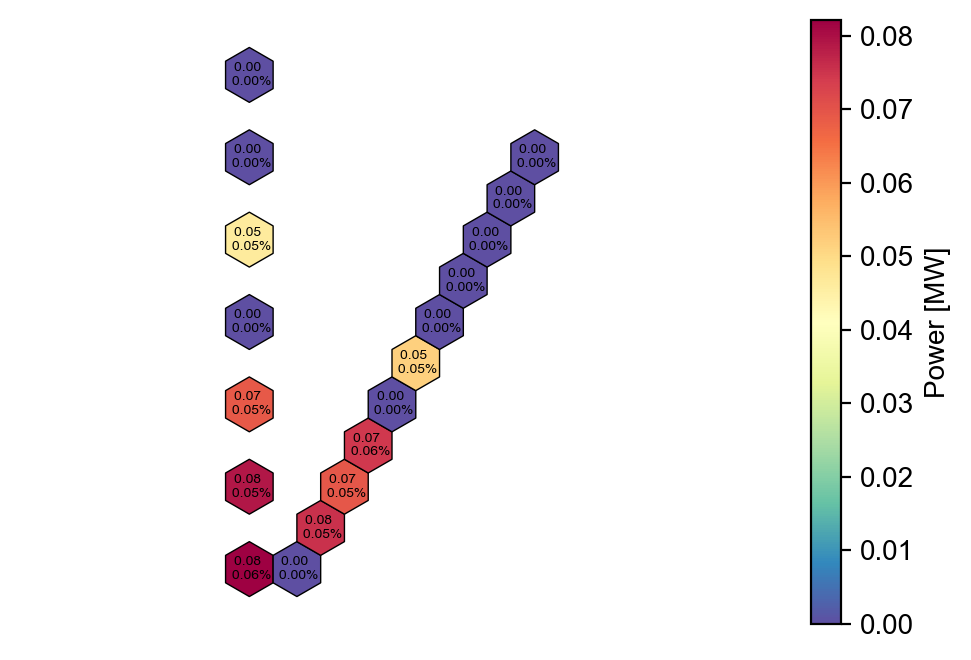

In [7]:
# try to plot physics
cut1 = [2, 81, 94, 106, 117, 127, 136]
cut2 = [3, 15, 26, 36, 45, 53, 60, 66, 71, 75, 78]
#print([core.fren2serp[k] for k in [1, 2, 3]])
core.plot(what={"tallies": tallies_mod, "errors": errors},
          label=True, which=[*cut1, *cut2], fren=True, size=5,
          cbarLabel="Power [MW]")
